In [2]:
import tensorflow as tf
from tensorflow import keras
import sklearn
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [10]:
def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [33]:
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])

###출력은 기본적으로 인코더의 입력과같다.
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer = keras.optimizers.SGD(lr=0.1))

In [34]:
history = autoencoder.fit(X_train, X_train, epochs=20)

Train on 60 samples
Epoch 1/20
60/60 [==============================] - 0s 3ms/sample - loss: 0.8063
Epoch 2/20
60/60 [==============================] - 0s 116us/sample - loss: 0.6137
Epoch 3/20
60/60 [==============================] - 0s 100us/sample - loss: 0.5093
Epoch 4/20
60/60 [==============================] - 0s 100us/sample - loss: 0.4426
Epoch 5/20
60/60 [==============================] - 0s 100us/sample - loss: 0.3938
Epoch 6/20
60/60 [==============================] - 0s 83us/sample - loss: 0.3555
Epoch 7/20
60/60 [==============================] - 0s 99us/sample - loss: 0.3234
Epoch 8/20
60/60 [==============================] - 0s 100us/sample - loss: 0.2950
Epoch 9/20
60/60 [==============================] - 0s 83us/sample - loss: 0.2680
Epoch 10/20
60/60 [==============================] - 0s 83us/sample - loss: 0.2416
Epoch 11/20
60/60 [==============================] - 0s 100us/sample - loss: 0.2157
Epoch 12/20
60/60 [==============================] - 0s 83us/sample - l

In [35]:
codings = encoder.predict(X_train)

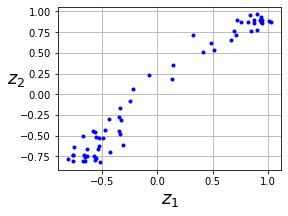

In [41]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

# 적층 오토인코더 

In [4]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [9]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28*28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.5), metrics=[rounded_accuracy])
history = stacked_ae.fit(X_train, X_train, epochs=10, validation_data = (X_valid, X_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 88us/sample - loss: 0.3376 - rounded_accuracy: 0.8878 - val_loss: 0.3191 - val_rounded_accuracy: 0.8985
Epoch 2/10
55000/55000 [==============================] - 4s 69us/sample - loss: 0.3063 - rounded_accuracy: 0.9147 - val_loss: 0.3041 - val_rounded_accuracy: 0.9157
Epoch 3/10
55000/55000 [==============================] - 4s 72us/sample - loss: 0.2992 - rounded_accuracy: 0.9210 - val_loss: 0.2975 - val_rounded_accuracy: 0.9250
Epoch 4/10
55000/55000 [==============================] - 4s 73us/sample - loss: 0.2953 - rounded_accuracy: 0.9243 - val_loss: 0.2949 - val_rounded_accuracy: 0.9266
Epoch 5/10
55000/55000 [==============================] - 4s 70us/sample - loss: 0.2928 - rounded_accuracy: 0.9265 - val_loss: 0.2926 - val_rounded_accuracy: 0.9281
Epoch 6/10
55000/55000 [==============================] - 4s 70us/sample - loss: 0.2909 - rounded_accuracy: 0.9280 - val_loss:

In [13]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(784, activation="sigmoid", input_shape=[100]),
    keras.layers.Reshape([28, 28])
])

stacked_ae_2 = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae_2.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.5), metrics=[rounded_accuracy])
history = stacked_ae_2.fit(X_train, X_train, epochs=10, validation_data = (X_valid, X_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 89us/sample - loss: 0.3456 - rounded_accuracy: 0.8869 - val_loss: 0.3126 - val_rounded_accuracy: 0.9145
Epoch 2/10
55000/55000 [==============================] - 5s 87us/sample - loss: 0.3042 - rounded_accuracy: 0.9202 - val_loss: 0.3009 - val_rounded_accuracy: 0.9245
Epoch 3/10
55000/55000 [==============================] - 5s 95us/sample - loss: 0.2953 - rounded_accuracy: 0.9283 - val_loss: 0.2940 - val_rounded_accuracy: 0.9307
Epoch 4/10
55000/55000 [==============================] - 5s 88us/sample - loss: 0.2897 - rounded_accuracy: 0.9337 - val_loss: 0.2894 - val_rounded_accuracy: 0.9359
Epoch 5/10
55000/55000 [==============================] - 5s 84us/sample - loss: 0.2860 - rounded_accuracy: 0.9372 - val_loss: 0.2863 - val_rounded_accuracy: 0.9383
Epoch 6/10
55000/55000 [==============================] - 5s 84us/sample - loss: 0.2833 - rounded_accuracy: 0.9397 - val_loss:

In [7]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")
def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

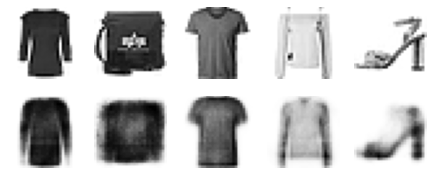

In [10]:
show_reconstructions(stacked_ae)

In [74]:
def show_reconstructions_train(model, images=X_train, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

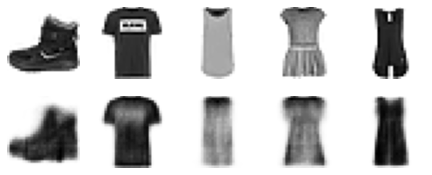

In [75]:
show_reconstructions_train(stacked_ae)

In [11]:
from sklearn.manifold import TSNE

X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)

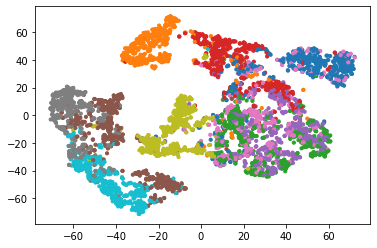

In [12]:
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")

In [14]:
X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)

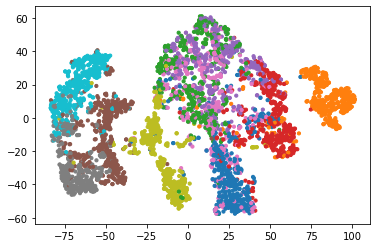

In [15]:
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")

# 비지도학습

In [109]:
class DenseTranspose(keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        self.dense=dense
        self.activation=keras.activations.get(activation)
        super().__init__(**kwargs)
    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias", initializer="zeros", shape=[self.dense.input_shape[-1]])
        super().build(batch_input_shape)
        print(batch_input_shape)
    def call(self, inputs):
        z = tf.matmul(inputs, self.dense.weights[0], transpose_b = True)
        return self.activation(z + self.biases)

In [110]:
dense_1 = keras.layers.Dense(100, activation="selu")
dense_2 = keras.layers.Dense(30, activation="selu")

tied_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    dense_1, dense_2
])

tied_decoder = keras.models.Sequential([
    DenseTranspose(dense_2, activation="selu"),
    DenseTranspose(dense_1, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

tied_ae = keras.models.Sequential([tied_encoder, tied_decoder])

(None, 30)
(None, 100)


In [111]:
tied_ae.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy])
history = tied_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 97us/sample - loss: 0.3276 - rounded_accuracy: 0.8952 - val_loss: 0.3034 - val_rounded_accuracy: 0.9187
Epoch 2/10
55000/55000 [==============================] - 5s 88us/sample - loss: 0.2980 - rounded_accuracy: 0.9220 - val_loss: 0.2943 - val_rounded_accuracy: 0.9277
Epoch 3/10
55000/55000 [==============================] - 5s 87us/sample - loss: 0.2916 - rounded_accuracy: 0.9281 - val_loss: 0.2908 - val_rounded_accuracy: 0.9311
Epoch 4/10
55000/55000 [==============================] - 5s 90us/sample - loss: 0.2884 - rounded_accuracy: 0.9310 - val_loss: 0.2913 - val_rounded_accuracy: 0.9256
Epoch 5/10
55000/55000 [==============================] - 5s 88us/sample - loss: 0.2864 - rounded_accuracy: 0.9327 - val_loss: 0.2863 - val_rounded_accuracy: 0.9342
Epoch 6/10
55000/55000 [==============================] - 5s 91us/sample - loss: 0.2849 - rounded_accuracy: 0.9340 - val_loss:

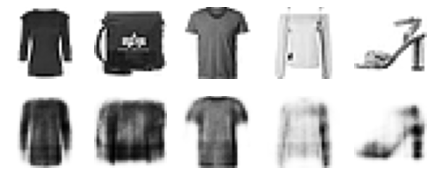

In [76]:
show_reconstructions(tied_ae)
plt.show()

In [81]:
X_train.shape[-1]

28

In [82]:
def train_autoencoder(n_neurons, X_train, X_valid, loss, optimizer,
                      n_epochs=10, output_activation=None, metrics=None):
    n_inputs = X_train.shape[-1]
    encoder = keras.models.Sequential([
        keras.layers.Dense(n_neurons, activation="selu", input_shape=[n_inputs])
    ])
    decoder = keras.models.Sequential([
        keras.layers.Dense(n_inputs, activation=output_activation),
    ])
    autoencoder = keras.models.Sequential([encoder, decoder])
    autoencoder.compile(optimizer, loss, metrics=metrics)
    autoencoder.fit(X_train, X_train, epochs=n_epochs,
                    validation_data=(X_valid, X_valid))
    return encoder, decoder, encoder(X_train), encoder(X_valid)

In [117]:
K = keras.backend
X_train_flat = K.batch_flatten(X_train) # equivalent to .reshape(-1, 28 * 28)
X_valid_flat = K.batch_flatten(X_valid)
enc1, dec1, X_train_enc1, X_valid_enc1 = train_autoencoder(
    100, X_train_flat, X_valid_flat, "binary_crossentropy",
    keras.optimizers.SGD(learning_rate=1.5), output_activation="sigmoid", metrics=[rounded_accuracy])
enc2, dec2, _, _ = train_autoencoder(
    30, X_train_enc1, X_valid_enc1, "mse", keras.optimizers.SGD(learning_rate=0.05),
    output_activation="selu")

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 90us/sample - loss: 0.3444 - rounded_accuracy: 0.8875 - val_loss: 0.3114 - val_rounded_accuracy: 0.9159
Epoch 2/10
55000/55000 [==============================] - 5s 82us/sample - loss: 0.3028 - rounded_accuracy: 0.9214 - val_loss: 0.2997 - val_rounded_accuracy: 0.9250
Epoch 3/10
55000/55000 [==============================] - 5s 85us/sample - loss: 0.2943 - rounded_accuracy: 0.9292 - val_loss: 0.2930 - val_rounded_accuracy: 0.9321
Epoch 4/10
55000/55000 [==============================] - 5s 83us/sample - loss: 0.2888 - rounded_accuracy: 0.9345 - val_loss: 0.2885 - val_rounded_accuracy: 0.9362
Epoch 5/10
55000/55000 [==============================] - 5s 84us/sample - loss: 0.2851 - rounded_accuracy: 0.9381 - val_loss: 0.2855 - val_rounded_accuracy: 0.9393
Epoch 6/10
55000/55000 [==============================] - 4s 81us/sample - loss: 0.2824 - rounded_accuracy: 0.9406 - val_loss:

In [101]:
X_train_enc1

<tf.Tensor: shape=(55000, 100), dtype=float32, numpy=
array([[ 2.899841  , -0.07063891,  2.393328  , ...,  4.598262  ,
         4.015145  ,  4.6966    ],
       [-1.6050962 ,  2.7536752 ,  2.2458057 , ...,  2.8706055 ,
         0.28742263,  4.530088  ],
       [ 1.6825762 ,  4.117935  ,  0.9714548 , ...,  2.3226535 ,
         1.8253347 ,  2.0908284 ],
       ...,
       [ 4.786217  ,  0.7313802 ,  5.112988  , ...,  3.3536627 ,
         2.06387   ,  2.3118865 ],
       [-1.7039462 ,  2.3671124 ,  0.13223237, ...,  3.8556752 ,
        -0.18679793,  5.149263  ],
       [ 1.6983489 ,  4.698898  , -0.61697143, ...,  5.6029067 ,
         3.2354248 ,  3.9160235 ]], dtype=float32)>

In [85]:
stacked_ae_1_by_1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    enc1, enc2, dec2, dec1,
    keras.layers.Reshape([28, 28])
])

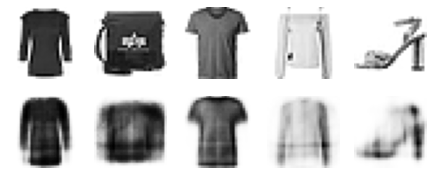

In [86]:
show_reconstructions(stacked_ae_1_by_1)
plt.show()

In [116]:
stacked_ae_1_by_1.compile(loss="binary_crossentropy",
                          optimizer=keras.optimizers.SGD(learning_rate=0.1), metrics=[rounded_accuracy])
history = stacked_ae_1_by_1.fit(X_train, X_train, epochs=10,
                                validation_data=(X_valid, X_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 93us/sample - loss: 0.2846 - rounded_accuracy: 0.9364 - val_loss: 0.2864 - val_rounded_accuracy: 0.9362
Epoch 2/10
55000/55000 [==============================] - 5s 85us/sample - loss: 0.2845 - rounded_accuracy: 0.9364 - val_loss: 0.2863 - val_rounded_accuracy: 0.9364
Epoch 3/10
55000/55000 [==============================] - 5s 85us/sample - loss: 0.2844 - rounded_accuracy: 0.9365 - val_loss: 0.2862 - val_rounded_accuracy: 0.9363
Epoch 4/10
55000/55000 [==============================] - 5s 85us/sample - loss: 0.2843 - rounded_accuracy: 0.9366 - val_loss: 0.2862 - val_rounded_accuracy: 0.9362
Epoch 5/10
55000/55000 [==============================] - 5s 85us/sample - loss: 0.2843 - rounded_accuracy: 0.9367 - val_loss: 0.2861 - val_rounded_accuracy: 0.9365
Epoch 6/10
55000/55000 [==============================] - 4s 82us/sample - loss: 0.2842 - rounded_accuracy: 0.9367 - val_loss:

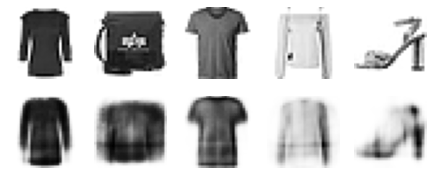

In [89]:
show_reconstructions(stacked_ae_1_by_1)
plt.show()

# 합성곱 오토인코더 

In [123]:
conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=3, padding="same", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
])

conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="valid", activation="selu", input_shape=[3,3,64]),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="same", activation="selu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="same", activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])

conv_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),metrics=[rounded_accuracy])
history = conv_ae.fit(X_train, X_train, epochs=5, validation_data = (X_valid, X_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 7s 135us/sample - loss: 0.3011 - rounded_accuracy: 0.9193 - val_loss: 0.2786 - val_rounded_accuracy: 0.9420
Epoch 2/5
55000/55000 [==============================] - 6s 117us/sample - loss: 0.2755 - rounded_accuracy: 0.9415 - val_loss: 0.2748 - val_rounded_accuracy: 0.9446
Epoch 3/5
55000/55000 [==============================] - 7s 118us/sample - loss: 0.2709 - rounded_accuracy: 0.9460 - val_loss: 0.2715 - val_rounded_accuracy: 0.9460
Epoch 4/5
55000/55000 [==============================] - 6s 118us/sample - loss: 0.2684 - rounded_accuracy: 0.9485 - val_loss: 0.2681 - val_rounded_accuracy: 0.9508
Epoch 5/5
55000/55000 [==============================] - 6s 118us/sample - loss: 0.2666 - rounded_accuracy: 0.9504 - val_loss: 0.2663 - val_rounded_accuracy: 0.9529


# 순환 오토인코더 

In [257]:
recurrent_encoder = keras.models.Sequential([
### input_shape=[28, 28]은 28 timestep에 대한 28개의 변화값이다.
### 출력차원이 [..., 28, 100]형태를 띄는건 당연하다
    keras.layers.LSTM(100, return_sequences=True, input_shape=[28, 28]),
    keras.layers.LSTM(30)
])

recurrent_decoder = keras.models.Sequential([
###REpeatVector는  ...,30 -> (...,28, 30)형태로 입력을 반복한다
    keras.layers.RepeatVector(28, input_shape=[30]),
    keras.layers.LSTM(100, return_sequences=True, input_shape=[28, 30]),
    keras.layers.TimeDistributed(keras.layers.Dense(28, activation="sigmoid", input_shape=[28, 100]))
])

recurrent_ae = keras.models.Sequential([recurrent_encoder, recurrent_decoder])

In [258]:
recurrent_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(0.1),
                     metrics=[rounded_accuracy])

In [259]:
history = recurrent_ae.fit(X_train, X_train, epochs=10, validation_data = (X_valid, X_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 17s 307us/sample - loss: 0.5002 - rounded_accuracy: 0.7775 - val_loss: 0.4374 - val_rounded_accuracy: 0.8152
Epoch 2/10
55000/55000 [==============================] - 12s 223us/sample - loss: 0.3939 - rounded_accuracy: 0.8480 - val_loss: 0.3745 - val_rounded_accuracy: 0.8665
Epoch 3/10
55000/55000 [==============================] - 12s 222us/sample - loss: 0.3631 - rounded_accuracy: 0.8724 - val_loss: 0.3556 - val_rounded_accuracy: 0.8795
Epoch 4/10
55000/55000 [==============================] - 12s 223us/sample - loss: 0.3499 - rounded_accuracy: 0.8815 - val_loss: 0.3435 - val_rounded_accuracy: 0.8862
Epoch 5/10
55000/55000 [==============================] - 12s 222us/sample - loss: 0.3394 - rounded_accuracy: 0.8889 - val_loss: 0.3409 - val_rounded_accuracy: 0.8808
Epoch 6/10
55000/55000 [==============================] - 12s 223us/sample - loss: 0.3319 - rounded_accuracy: 0.8939

# 잡음 제거 오토인코더  

In [248]:
dropout_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])

dropout_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

dropout_ae = keras.models.Sequential([dropout_encoder, dropout_decoder])

In [249]:
dropout_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                     metrics=[rounded_accuracy])
history = dropout_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 32s 581us/sample - loss: 0.3529 - rounded_accuracy: 0.8739 - val_loss: 0.3198 - val_rounded_accuracy: 0.9052
Epoch 2/10
55000/55000 [==============================] - 7s 118us/sample - loss: 0.3184 - rounded_accuracy: 0.9028 - val_loss: 0.3135 - val_rounded_accuracy: 0.9063
Epoch 3/10
55000/55000 [==============================] - 6s 114us/sample - loss: 0.3125 - rounded_accuracy: 0.9077 - val_loss: 0.3073 - val_rounded_accuracy: 0.9150
Epoch 4/10
55000/55000 [==============================] - 7s 120us/sample - loss: 0.3088 - rounded_accuracy: 0.9107 - val_loss: 0.3044 - val_rounded_accuracy: 0.9175
Epoch 5/10
55000/55000 [==============================] - 6s 117us/sample - loss: 0.3062 - rounded_accuracy: 0.9128 - val_loss: 0.3020 - val_rounded_accuracy: 0.9193
Epoch 6/10
55000/55000 [==============================] - 6s 113us/sample - loss: 0.3042 - rounded_accuracy: 0.9144 - va

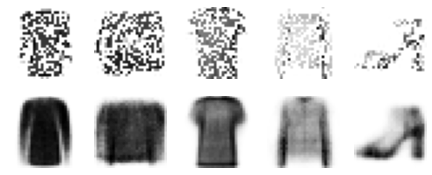

In [253]:
dropout = keras.layers.Dropout(0.5)
show_reconstructions(dropout_ae, dropout(X_valid, training=True))
plt.show()

In [251]:
denoising_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.GaussianNoise(0.2),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])
denoising_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
denoising_ae = keras.models.Sequential([denoising_encoder, denoising_decoder])
denoising_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                     metrics=[rounded_accuracy])
history = denoising_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 112us/sample - loss: 0.3478 - rounded_accuracy: 0.8795 - val_loss: 0.3162 - val_rounded_accuracy: 0.9082
Epoch 2/10
55000/55000 [==============================] - 6s 110us/sample - loss: 0.3108 - rounded_accuracy: 0.9113 - val_loss: 0.3059 - val_rounded_accuracy: 0.9173
Epoch 3/10
55000/55000 [==============================] - 6s 110us/sample - loss: 0.3043 - rounded_accuracy: 0.9167 - val_loss: 0.3014 - val_rounded_accuracy: 0.9223
Epoch 4/10
55000/55000 [==============================] - 6s 111us/sample - loss: 0.3005 - rounded_accuracy: 0.9200 - val_loss: 0.2984 - val_rounded_accuracy: 0.9252
Epoch 5/10
55000/55000 [==============================] - 6s 111us/sample - loss: 0.2978 - rounded_accuracy: 0.9223 - val_loss: 0.2955 - val_rounded_accuracy: 0.9271
Epoch 6/10
55000/55000 [==============================] - 6s 111us/sample - loss: 0.2958 - rounded_accuracy: 0.9241 - val

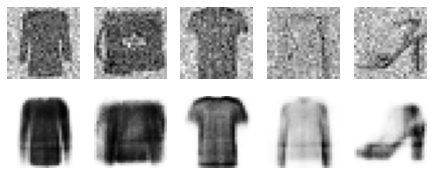

In [252]:
noise = keras.layers.GaussianNoise(0.2)
show_reconstructions(denoising_ae, noise(X_valid, training=True))

# 희소 오토인코더 

In [254]:
sparse_l1_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(300, activation="sigmoid"),
    keras.layers.ActivityRegularization(l1=1e-3)
])

sparse_l1_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[300]),
    keras.layers.Dense(28*28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

In [255]:
sparse_l1_ae = keras.models.Sequential([sparse_l1_encoder, sparse_l1_decoder])
sparse_l1_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                     metrics=[rounded_accuracy])
history = sparse_l1_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 102us/sample - loss: 0.4322 - rounded_accuracy: 0.8137 - val_loss: 0.3821 - val_rounded_accuracy: 0.8602
Epoch 2/10
55000/55000 [==============================] - 6s 102us/sample - loss: 0.3698 - rounded_accuracy: 0.8681 - val_loss: 0.3670 - val_rounded_accuracy: 0.8756
Epoch 3/10
55000/55000 [==============================] - 6s 113us/sample - loss: 0.3551 - rounded_accuracy: 0.8792 - val_loss: 0.3517 - val_rounded_accuracy: 0.8796
Epoch 4/10
55000/55000 [==============================] - 6s 106us/sample - loss: 0.3437 - rounded_accuracy: 0.8879 - val_loss: 0.3417 - val_rounded_accuracy: 0.8894
Epoch 5/10
55000/55000 [==============================] - 6s 111us/sample - loss: 0.3367 - rounded_accuracy: 0.8930 - val_loss: 0.3358 - val_rounded_accuracy: 0.8963
Epoch 6/10
55000/55000 [==============================] - 6s 109us/sample - loss: 0.3307 - rounded_accuracy: 0.8985 - val

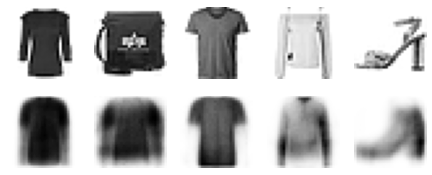

In [256]:
show_reconstructions(sparse_l1_ae)

In [4]:
K = keras.backend
kl_divergence = keras.losses.kullback_leibler_divergence

class KLDivergenceRefularizer(keras.regularizers.Regularizer):
    def __init__(self, weight, target=0.1):
        self.weight=weight
        self.target = target
    def __call__(self, inputs):
        mean_activities = K.mean(inputs, axis=0)
        return self.weight * (kl_divergence(self.target, mean_activities) + kl_divergence(1. -self.target, 1 - mean_activities))

In [6]:
kld_reg = KLDivergenceRefularizer(weight=0.05, target=0.1)
sparse_kl_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(300, activation="sigmoid", activity_regularizer=kld_reg)
])

sparse_kl_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[300]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

sparse_kl_ae = keras.models.Sequential([sparse_kl_encoder, sparse_kl_decoder])

In [12]:
sparse_kl_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
              metrics=[rounded_accuracy])
history = sparse_kl_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 8s 140us/sample - loss: 0.4148 - rounded_accuracy: 0.8130 - val_loss: 0.3699 - val_rounded_accuracy: 0.8608
Epoch 2/10
55000/55000 [==============================] - 6s 113us/sample - loss: 0.3503 - rounded_accuracy: 0.8792 - val_loss: 0.3410 - val_rounded_accuracy: 0.8878
Epoch 3/10
55000/55000 [==============================] - 6s 112us/sample - loss: 0.3317 - rounded_accuracy: 0.8938 - val_loss: 0.3276 - val_rounded_accuracy: 0.9009
Epoch 4/10
55000/55000 [==============================] - 6s 113us/sample - loss: 0.3211 - rounded_accuracy: 0.9031 - val_loss: 0.3204 - val_rounded_accuracy: 0.9043
Epoch 5/10
55000/55000 [==============================] - 6s 112us/sample - loss: 0.3163 - rounded_accuracy: 0.9069 - val_loss: 0.3169 - val_rounded_accuracy: 0.9068
Epoch 6/10
55000/55000 [==============================] - 6s 113us/sample - loss: 0.3127 - rounded_accuracy: 0.9099 - val

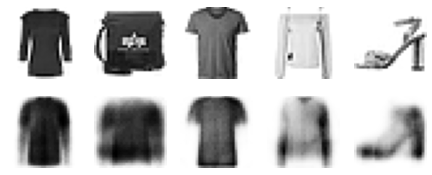

In [15]:
show_reconstructions(sparse_kl_ae)

# 변이형 오토인코더 

In [27]:
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean

In [19]:
coding_size = 10

inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
coding_mean = keras.layers.Dense(coding_size)(z)
coding_log_var = keras.layers.Dense(coding_size)(z)
codings = Sampling()([coding_mean, coding_log_var])
variational_encoder = keras.Model(
    inputs=[inputs], outputs = [coding_mean, coding_log_var, codings])

In [20]:
decoder_inputs = keras.layers.Input(shape=[coding_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)
variation_decoder = keras.Model(inputs = [decoder_inputs], outputs = [outputs])

In [21]:
_, _, codings = variational_encoder(inputs)
reconstructions = variation_decoder(codings)
variational_ae = keras.Model(inputs=[inputs], outputs = [reconstructions])

In [25]:
latent_loss = -0.5 * K.sum(1 + coding_log_var - K.exp(coding_log_var) - K.square(coding_mean), axis=-1)
variational_ae.add_loss(K.mean(latent_loss) / 784.)
variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=[rounded_accuracy])

In [26]:
history = variational_ae.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_valid, X_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 4s 72us/sample - loss: 0.3306 - rounded_accuracy: 0.9142 - val_loss: 0.3315 - val_rounded_accuracy: 0.9150
Epoch 2/50
55000/55000 [==============================] - 3s 49us/sample - loss: 0.3298 - rounded_accuracy: 0.9142 - val_loss: 0.3302 - val_rounded_accuracy: 0.9144
Epoch 3/50
55000/55000 [==============================] - 3s 49us/sample - loss: 0.3295 - rounded_accuracy: 0.9144 - val_loss: 0.3306 - val_rounded_accuracy: 0.9153
Epoch 4/50
55000/55000 [==============================] - 3s 49us/sample - loss: 0.3291 - rounded_accuracy: 0.9143 - val_loss: 0.3295 - val_rounded_accuracy: 0.9166
Epoch 5/50
55000/55000 [==============================] - 3s 49us/sample - loss: 0.3288 - rounded_accuracy: 0.9146 - val_loss: 0.3318 - val_rounded_accuracy: 0.9142
Epoch 6/50
55000/55000 [==============================] - 3s 49us/sample - loss: 0.3286 - rounded_accuracy: 0.9148 - val_loss:

Epoch 50/50
55000/55000 [==============================] - 3s 48us/sample - loss: 0.3240 - rounded_accuracy: 0.9172 - val_loss: 0.3263 - val_rounded_accuracy: 0.9169


In [28]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

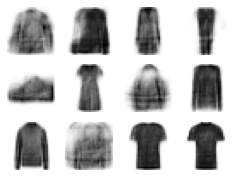

In [56]:
codings = tf.random.normal(shape=[12, coding_size])
images = variation_decoder(codings).numpy()
plot_multiple_images(images, 4)

# GAN 

In [57]:
coding_size = 30

generator = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[coding_size]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

discriminator = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(1, activation="sigmoid")
])

gan = keras.models.Sequential([generator, discriminator])

In [58]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop"),
discriminator.trainable=False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [61]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [66]:
def train_gan(gan, dataset, batch_size, coding_size, n_epochs=50):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        for X_batch in dataset:
            ### 판변자 훈련
            noise = tf.random.normal(shape=[batch_size, coding_size])
            generated_images = generator(noise)
            ### 각각 batch에 대한 생성 이미지 , X_batch 이미지를 연속적으로 이어 붙여 준다 
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable=True
            discriminator.train_on_batch(X_fake_and_real, y1)
            ### 생성자 훈련
            noise = tf.random.normal(shape=[batch_size, coding_size])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable=False
            gan.train_on_batch(noise, y2)
        plot_multiple_images(generated_images, 8)
        plt.show()

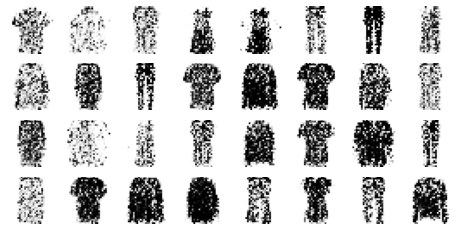

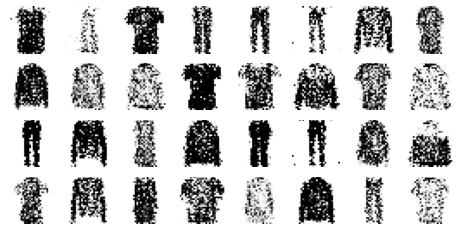

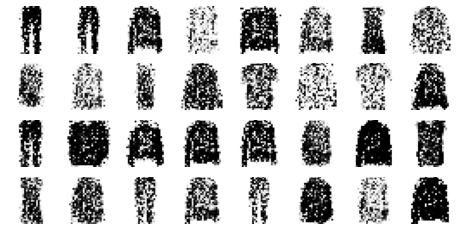

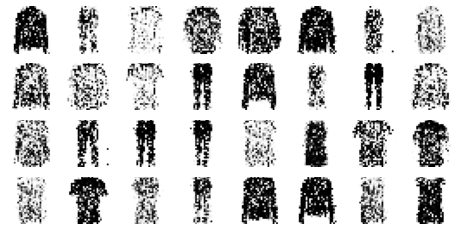

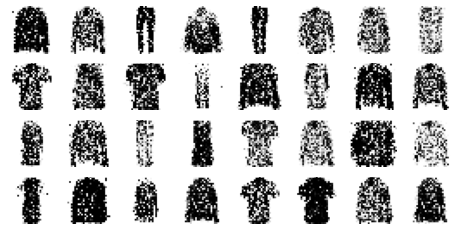

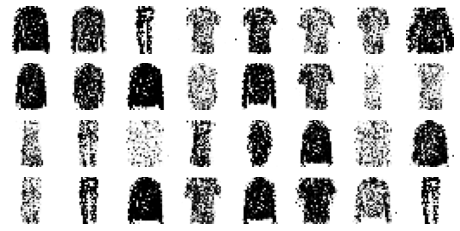

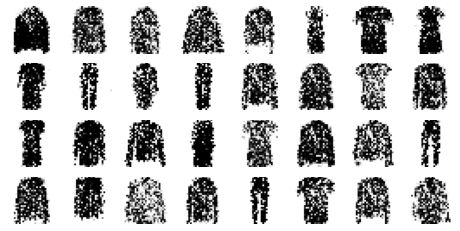

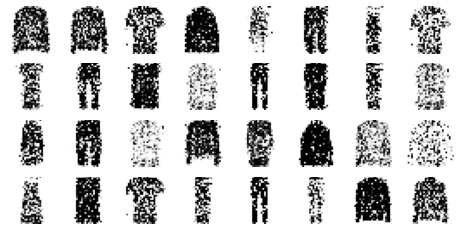

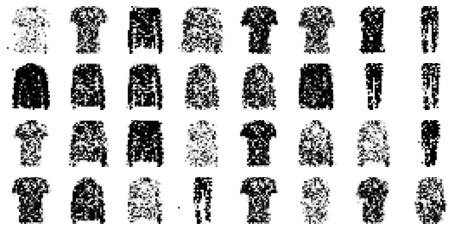

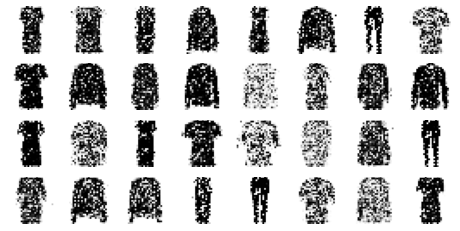

In [70]:
train_gan(gan, dataset, batch_size, coding_size, n_epochs=10)

# DCGAN 

In [86]:
tf.random.set_seed(42)
np.random.seed(42)

codings_size = 100

generator = keras.models.Sequential([
    keras.layers.Dense(7 * 7 * 128, input_shape=[codings_size]),
    keras.layers.Reshape([7, 7, 128]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="SAME",
                                 activation="selu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="SAME",
                                 activation="tanh"),
])
discriminator = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="SAME",
                        activation=keras.layers.LeakyReLU(0.2),
                        input_shape=[28, 28, 1]),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="SAME",
                        activation=keras.layers.LeakyReLU(0.2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="sigmoid")
])
gan = keras.models.Sequential([generator, discriminator])

In [87]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [88]:
X_train_dcgan = X_train.reshape(-1, 28, 28, 1) * 2. -1.

In [89]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train_dcgan)
dataset = dataset.shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

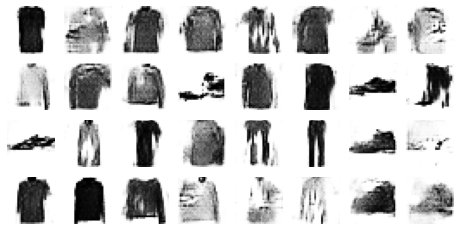

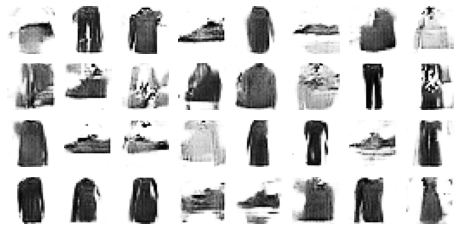

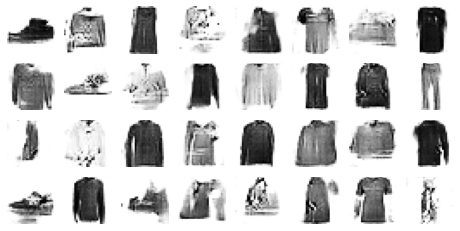

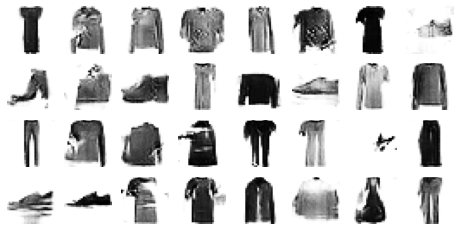

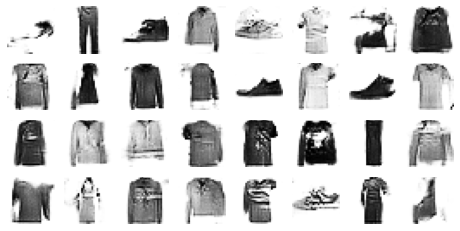

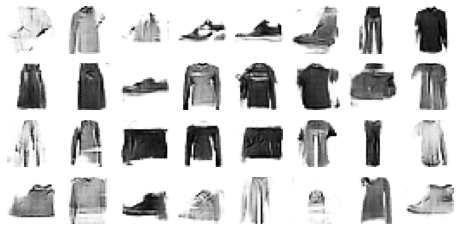

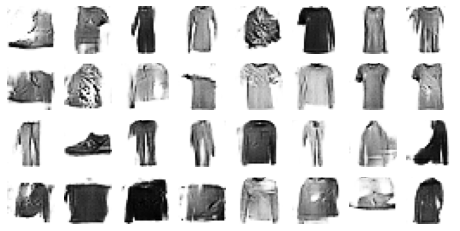

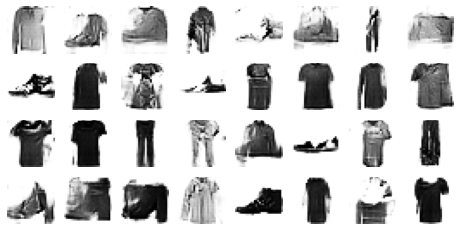

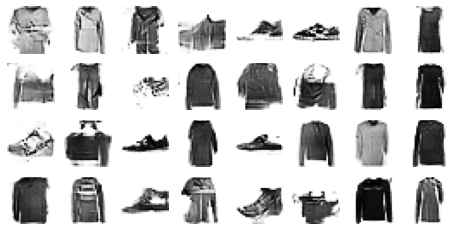

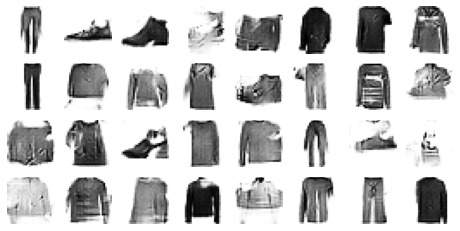

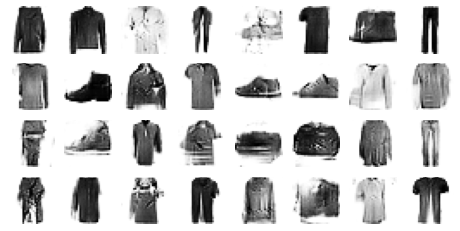

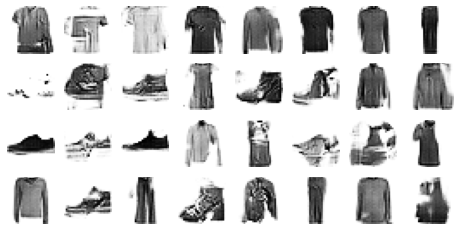

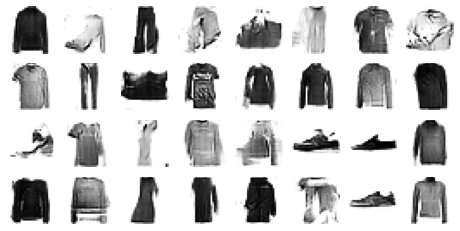

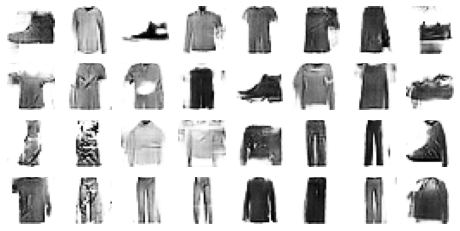

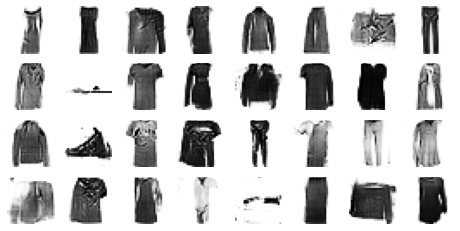

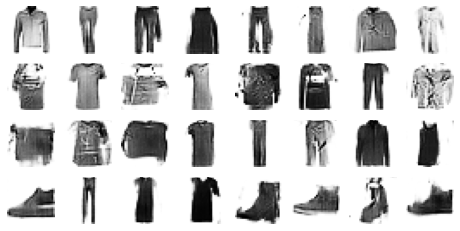

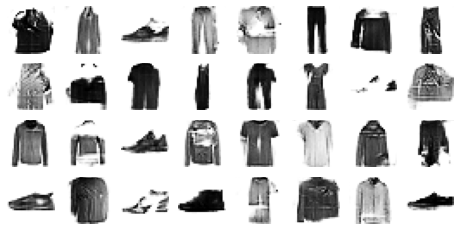

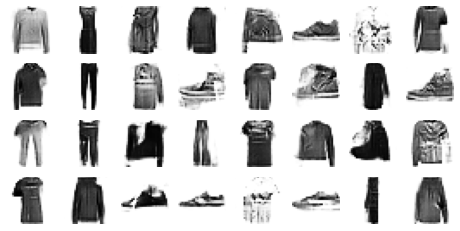

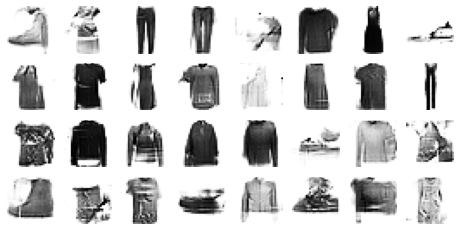

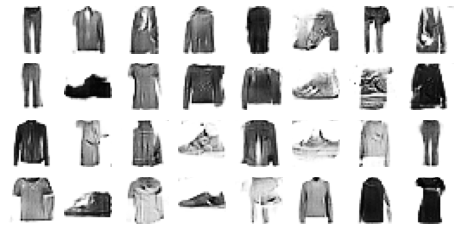

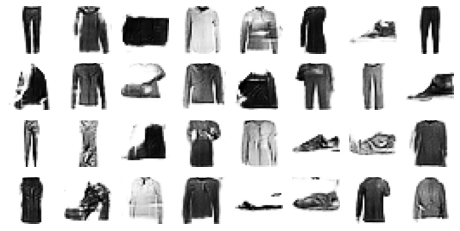

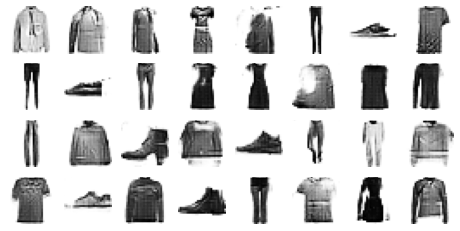

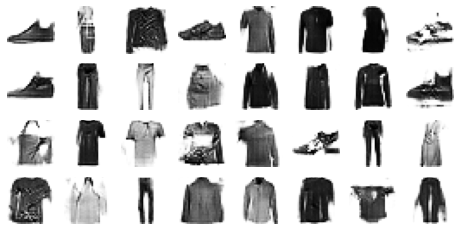

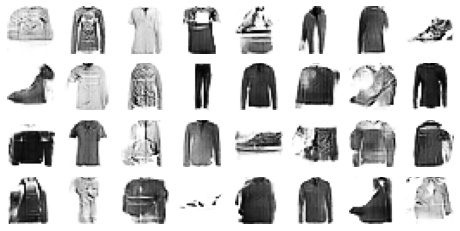

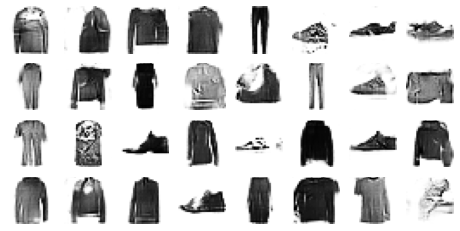

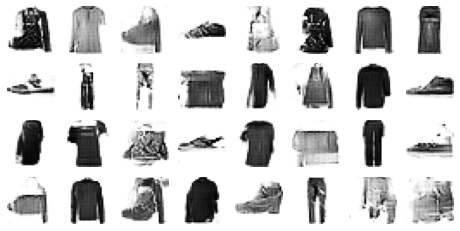

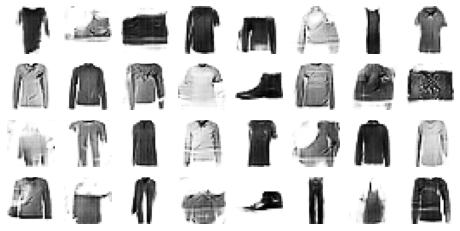

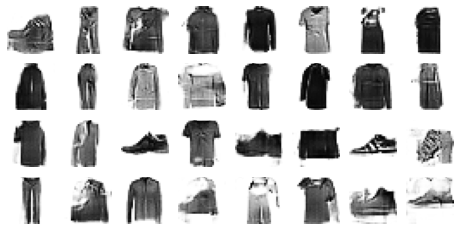

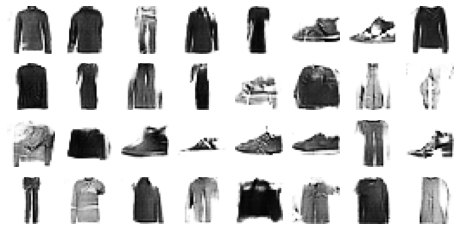

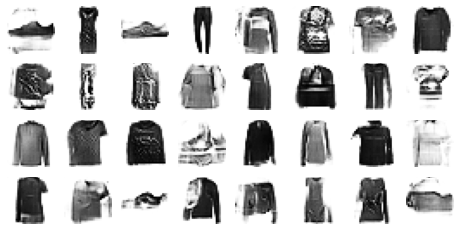

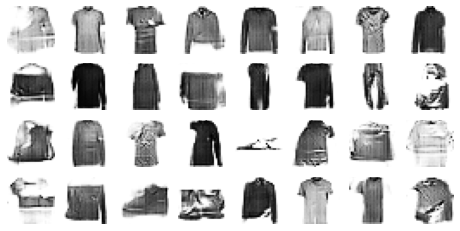

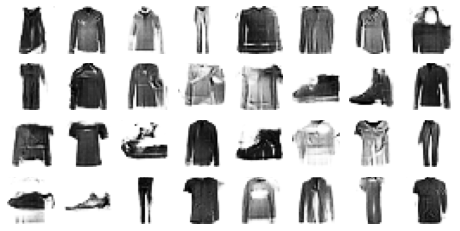

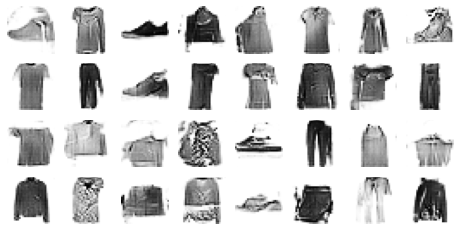

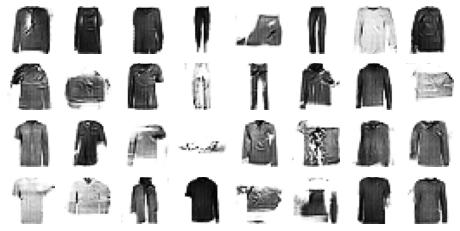

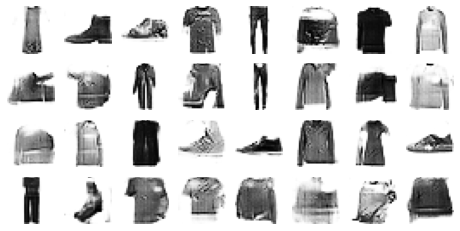

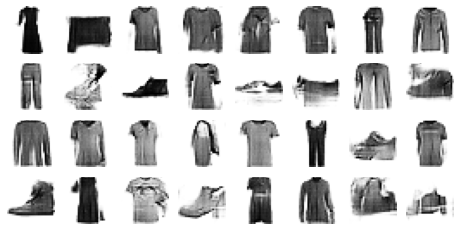

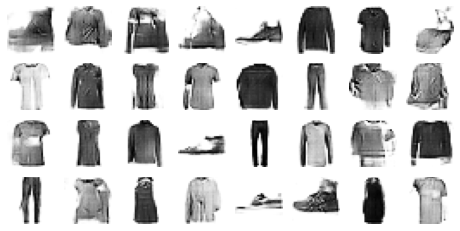

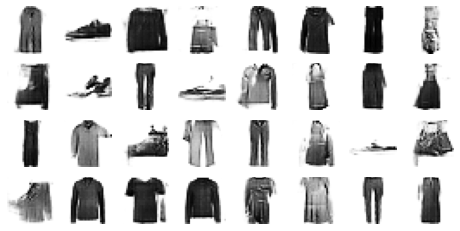

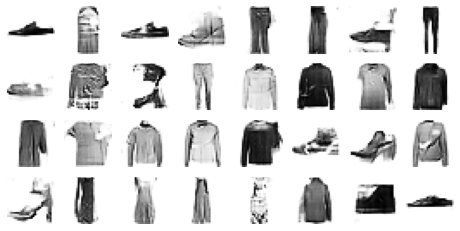

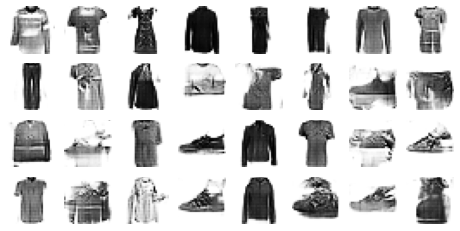

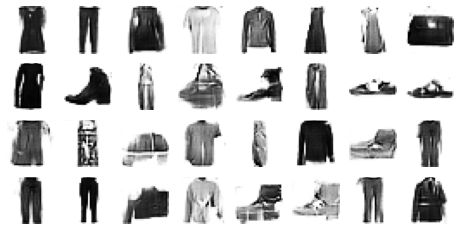

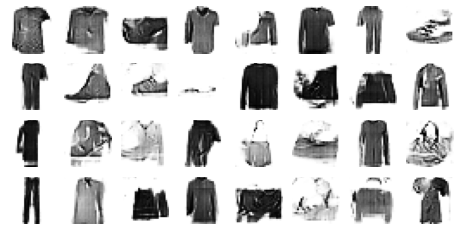

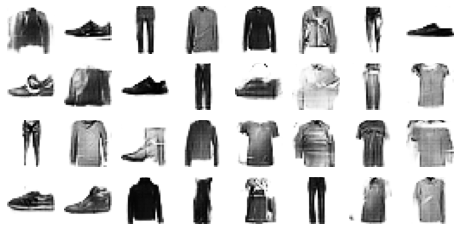

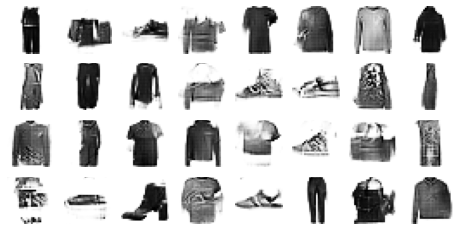

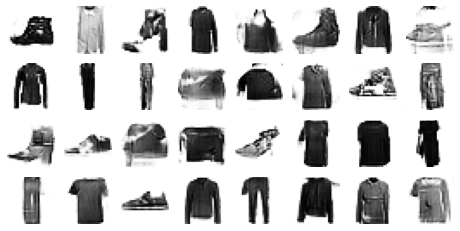

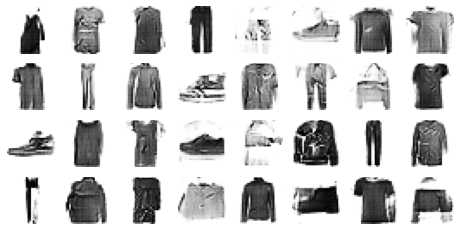

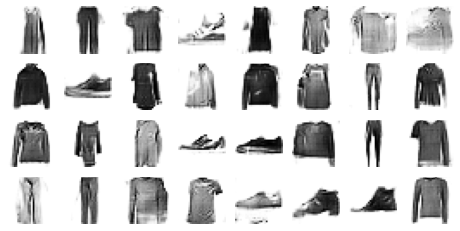

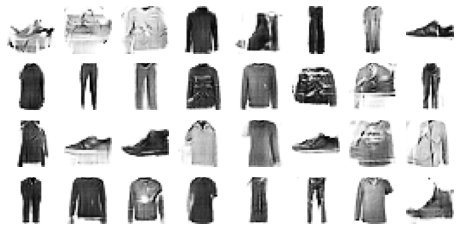

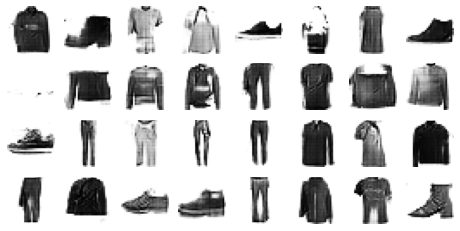

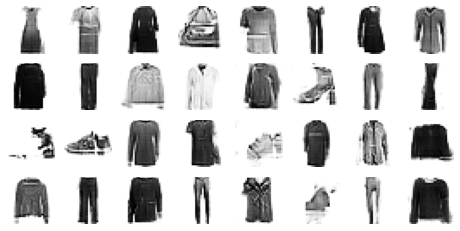

In [90]:
train_gan(gan, dataset, batch_size, codings_size)